In [12]:
from helper.image_datasetloader import DatasetLoader
from helper.image_preprocessing import ImagePreprocessing,HSVPreprocessing
from imutils import paths
import numpy as np
import matplotlib.pyplot as plt
import os


# Load Dataset

In [2]:
image_paths = list(paths.list_images("./raw"))

# Preprocessing
initialize the image preprocessor, load the dataset from disk,
and reshape the data matrix

In [3]:
preprocessing_conf = HSVPreprocessing(width=32,heigh=32)
dataset_loader = DatasetLoader(preprocessors=[preprocessing_conf])
(train_data,train_labels) = dataset_loader.load(imagePaths=image_paths,verbose=10)
print(train_data.shape)
train_data = train_data.reshape((train_data.shape[0],train_data.shape[1]*train_data.shape[2]*train_data.shape[3]))

[INFO] processed 10/43
[INFO] processed 20/43
[INFO] processed 30/43
[INFO] processed 40/43
(43, 32, 32, 3)


## Label Encoding

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,auc

label_model = LabelEncoder()
n_labels = label_model.fit_transform(train_labels)
set(n_labels),set(train_labels)

({0, 1, 2, 3}, {'babi', 'buaya', 'gajah', 'kucing'})

## Train Model

In [5]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
trained_model =  model.fit(X=train_data,y=train_labels)
print("Score : {}".format(trained_model.score(X=train_data,y=train_labels)))

Score : 0.7441860465116279


In [6]:
from sklearn.metrics import accuracy_score

y_predict = trained_model.predict(train_data)
acc = accuracy_score(y_pred=y_predict,y_true=train_labels)
print("Accuracy : {}".format(acc))

Accuracy : 0.7441860465116279


# Test Model

In [33]:
classfication_result = []
filename = []
label = []
for image_path in image_paths:
    true_label = image_path.split(os.path.sep)[-2]
    filename.append(image_path.split(os.path.sep)[-1])
    label.append(true_label)

    (testdata,labels) = dataset_loader.load([image_path])
    testdata = testdata.reshape((testdata.shape[0],testdata.shape[1]*testdata.shape[2]*testdata.shape[3]))

    predicted = trained_model.predict(testdata)

    if str(predicted[0]) == true_label:
        classfication_result.append(True)
    else:
        classfication_result.append(False)
    # print("{} - Should Be : {} --> Predicted {} ".format(image_path,true_label,predicted))

classfication_result = np.array([label,filename,classfication_result])

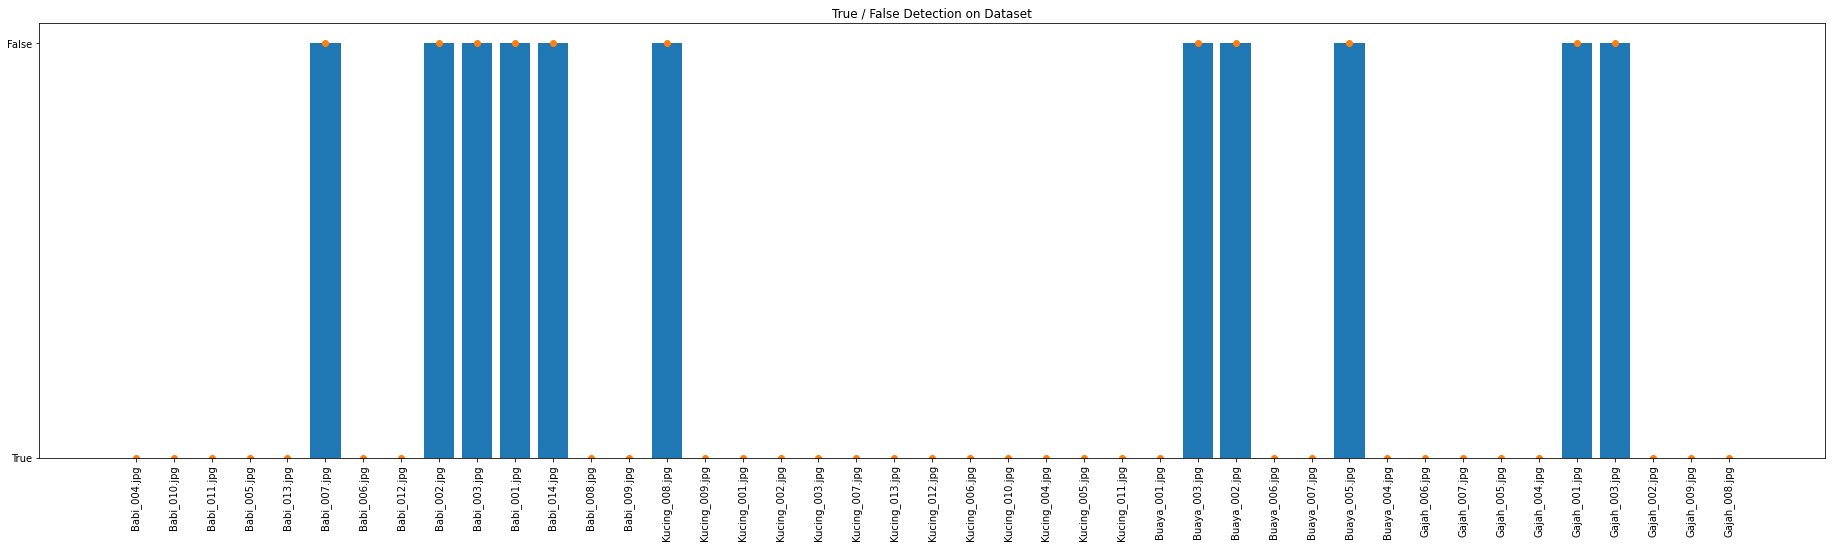

In [36]:
plt.figure(figsize=(32,8))
plt.title("True / False Detection on Dataset")
plt.bar(classfication_result[1],classfication_result[2])
plt.scatter(classfication_result[1],classfication_result[2])
plt.xticks(rotation=90)
plt.show()